# World Population - Exploratory Data Analysis.
## Project 1: Practicing Pandas and Nunpy methods.

## Introduction

The data is from US Census Bureau. Dataset includes the population of every conutries from year 1970, 1980, 1990, 2000, 2010, 2015, 2020 and 2022 and Population Density, Area (km^2) , Growth Rate for each country.

There are lots of conversations about demografic crysis but what is it? Is crysis real? If yes, than what doest it mean? Popolation dissapearing or opposite? Surprisingly this small and simple dataset turned into interesting project for me.

**Questions to be answered:**
- What is the population of Planet? Is population of Planet increasing or decreasing?
- Top of most and lest populated countries?
- Top countries with higher growth rate?

- What will be the popilation on the planet in 2050?

## About Dataset

- Rank: Rank by population
- CCA3: 3 digit Country/Territories code
- Country: Name of the Country/Territories
- Capital: Name of the Capital
- Continent: Name of the Continent
- 2022 Population: Population of the Country/Territories in the year 2022
- 2020 Population: Population of the Country/Territories in the year 2020
- 2015 Population: Population of the Country/Territories in the year 2015
- 2010 Population: Population of the Country/Territories in the year 2010
- 2000 Population: Population of the Country/Territories in the year 2000
- 1990 Population: Population of the Country/Territories in the year 1990
- 1980 Population: Population of the Country/Territories in the year 1980
- 1970 Population: Population of the Country/Territories in the year 1970
- Area (km²): Area size of the Country/Territories in square kilometer
- Density (per km²): Population density per square kilometer
- Growth Rate: Population growth rate by Country/Territories
- World Population Percentage: The population percentage by each Country/Territories

Source: https://www.kaggle.com/

In [1]:
# Import all libraries

!pip install pandas
!pip install matplotlib basemap

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", category=DeprecationWarning, module="sklearn")

## Step 1. Data exploring and preparation.

Preliminary overview of the dataset, to examine visually and check structure of data, list of columns, missing data, ets.

In [3]:
# Download dataset.

url = "https://raw.githubusercontent.com/Koliada-LM-Data/Data-Sets-for-Projects/refs/heads/main/world_population.csv"
req = requests.get(url)
world_df = pd.read_csv(url)

In [4]:
# Preliminary overview of dataset, to see and check structure of data, list of columns, missing data, ets.

# print(world_df)
# world_df.head(5)
# world_df.tail(5)

print('\n First and last 5 rows of data: \n')
display(world_df)


 First and last 5 rows of data: 



,Rank,CCA3,Country_Territory,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per_km²),Growth_Rate,World_Population_Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [5]:
# Renaming year columns from "Year Population" to just "Year" for shorter name

for col in world_df.columns:
    if 'Population' in col:
        world_df = world_df.rename(columns={col: col.split('_')[0]})
world_df.head()

,Rank,CCA3,Country_Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),Growth_Rate,World
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [6]:
# List of columns in dataset.

print('\n List of columns in dataset: \n')
world_df.columns


 List of columns in dataset: 



Index(['Rank', 'CCA3', 'Country_Territory', 'Capital', 'Continent', '2022',
       '2020', '2015', '2010', '2000', '1990', '1980', '1970', 'Area_(km²)',
       'Density_(per_km²)', 'Growth_Rate', 'World'],
      dtype='object')

In [7]:
# Quantity of rows and columns in dataset.

# world_df.shape[0] - quantity of raws
# world_df.shape[1] - quantity of columns

print('\n Quantity of rows and columns: \n')
world_df.shape


 Quantity of rows and columns: 



(234, 17)

In [8]:
# Check if there are duplicated rows

world_df.duplicated().any()

np.False_

In [8]:
# Basic information about dataset: number of rows, list of columns, data type per column, quantity of non-null rows, ets.

print('\n Information on dataset: \n')
world_df.info()


 Information on dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               234 non-null    int64  
 1   CCA3               234 non-null    object 
 2   Country_Territory  234 non-null    object 
 3   Capital            234 non-null    object 
 4   Continent          234 non-null    object 
 5   2022               234 non-null    int64  
 6   2020               234 non-null    int64  
 7   2015               234 non-null    int64  
 8   2010               234 non-null    int64  
 9   2000               234 non-null    int64  
 10  1990               234 non-null    int64  
 11  1980               234 non-null    int64  
 12  1970               234 non-null    int64  
 13  Area_(km²)         234 non-null    int64  
 14  Density_(per_km²)  234 non-null    float64
 15  Growth_Rate        234 non-null    float64
 16

In [9]:
# Check for null cells, emty cells, unique values with more visually sufficticated output

# world_pop.shape[0] - returns quantity of rows in the dataset
# world_pop.shape[1] - returns quantity of columns in the dataset

# print('\n Quantity of zero cells per column: \n')
# world_df.isnull().sum()

# print('\n Quantity of NA cells per column: \n')
# world_df.isna().sum()

pd.DataFrame({'count': world_df.shape[0],
              'nulls': world_df.isnull().sum(),
              'cardinality': world_df.nunique(),
             })

,count,nulls,cardinality
Rank,234,0,234
CCA3,234,0,234
Country_Territory,234,0,234
Capital,234,0,234
Continent,234,0,6
2022,234,0,234
2020,234,0,234
2015,234,0,234
2010,234,0,234
2000,234,0,234


In [10]:
# Basic statistic on dataset: count(rows), mean, standard deviation, min value, max value, percentiles, ets.
# The following table describes count, mean, standard deviation, minimum, percentiles(1st quartile, 2nd quartile, 3rd quartile), maximumvalues of each numerical attribute.

print('\n Statistics on dataset: \n')
# world_df.describe()

world_df.describe().transpose().sort_values(ascending = 0, by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")


 Statistics on dataset: 



,count,mean,std,min,25%,50%,75%,max
2022,234.000000,34074414.709402,136766424.804763,510.000000,419738.500000,5559944.500000,22476504.750000,1425887337.000000
2020,234.000000,33501070.952991,135589876.924439,520.000000,415284.500000,5493074.500000,21447979.500000,1424929781.000000
2015,234.000000,31729956.243590,130404992.751760,564.000000,404676.000000,5307400.000000,19730853.750000,1393715448.000000
2010,234.000000,29845235.034188,124218487.632998,596.000000,393149.000000,4942770.500000,19159567.500000,1348191368.000000
2000,234.000000,26269468.816239,111698206.719070,651.000000,327242.000000,4292907.000000,15762301.000000,1264099069.000000
1990,234.000000,22710220.790598,97832173.346751,700.000000,264115.750000,3825409.500000,11869231.000000,1153704252.000000
1980,234.000000,18984616.970085,81785186.084201,733.000000,229614.250000,3141145.500000,9826053.750000,982372466.000000
1970,234.000000,15786908.807692,67795091.643236,752.000000,155997.000000,2604830.000000,8817329.000000,822534450.000000
Area_(km²),234.000000,581449.384615,1761840.864063,1.000000,2650.000000,81199.500000,430425.750000,17098242.000000
Density_(per_km²),234.000000,452.127044,2066.121904,0.026100,38.417875,95.346750,238.933250,23172.266700


## Insights:

- Dataset is small and includes only 234 rows.
- There are no missing values or empty sells in this dataset.
- There are numeric and categorical columns in the Dataset.
- Standard statistic is not very helpful in this particular dataset.

## Step 2. World's population.
Exploring change in world's total population in 52 years timeframe (1970 - 1922).

In [11]:
import plotly.express as px
from plotly.offline import iplot, plot

In [13]:
# Line plot showing total trend in population change for timeframe 1970 - 1922

trend = world_df.iloc[:,5:13].sum().sort_values(ascending=True)

fig = px.line(trend, x= trend.index, y= trend.values,
                  title='Total trend in population change for timeframe 1970 - 1922',
                  markers=True)

iplot(fig)

In [12]:
# Growth Rate on the map

fig = px.choropleth(world_df,
                    locations='Country_Territory',
                    locationmode='country names',
                    color='Growth_Rate',
                    hover_name='Country_Territory',
                    title = 'Growth Rate',
                    color_continuous_scale='Viridis'
                    )
fig.show()

In [14]:
# Top countries with highest Growth Rate

world_df.sort_values("Growth_Rate", ascending=False, ignore_index=True).head(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),Growth_Rate,World
0,135,MDA,Moldova,Chisinau,Europe,3272996,3084847,3277388,3678186,4251573,4480199,4103240,3711140,33846,96.7026,1.0691,0.04
1,37,POL,Poland,Warsaw,Europe,39857145,38428366,38553146,38597353,38504431,38064255,35521429,32482943,312679,127.4698,1.0404,0.50
2,54,NER,Niger,Niamey,Africa,26207977,24333639,20128124,16647543,11622665,8370647,6173177,4669708,1267000,20.6851,1.0378,0.33
3,60,SYR,Syria,Damascus,Asia,22125249,20772595,19205178,22337563,16307654,12408996,8898954,6319199,185180,119.4797,1.0376,0.28
4,116,SVK,Slovakia,Bratislava,Europe,5643453,5456681,5424444,5396424,5376690,5261305,4973883,4522867,49037,115.0856,1.0359,0.07


In [15]:
# Top countries with lowest Growth Rate

world_df.sort_values("Growth_Rate", ascending=False, ignore_index=True).tail(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),Growth_Rate,World
229,141,LTU,Lithuania,Vilnius,Europe,2750055,2820267,2963765,3139019,3599637,3785847,3521206,3210147,65300,42.1142,0.9869,0.03
230,108,BGR,Bulgaria,Sofia,Europe,6781953,6979175,7309253,7592273,8097691,8767778,8980606,8582950,110879,61.1654,0.9849,0.09
231,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
232,119,LBN,Lebanon,Beirut,Asia,5489739,5662923,6398940,4995800,4320642,3593700,2963702,2381791,10452,525.2334,0.9816,0.07
233,38,UKR,Ukraine,Kiev,Europe,39701739,43909666,44982564,45683020,48879755,51589817,49973920,47279086,603500,65.7858,0.9120,0.50


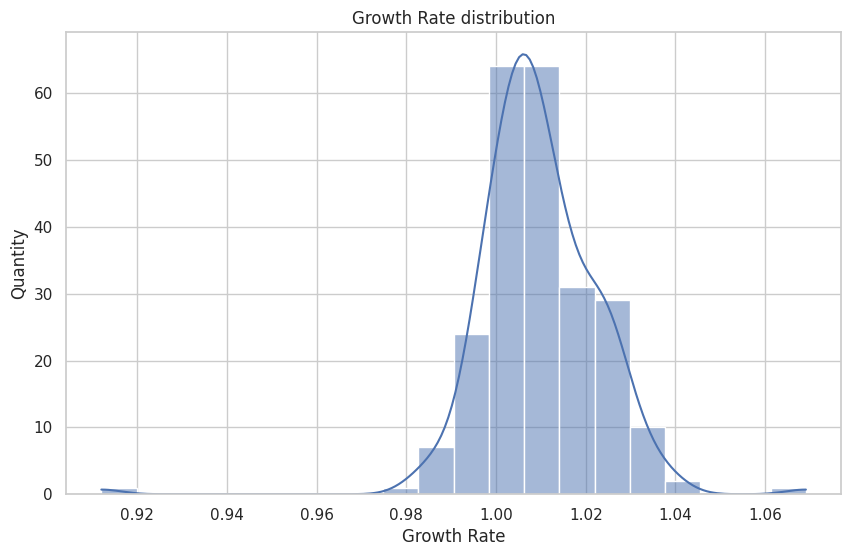


 Growth Rate coefficient demonstrates change in the population of countries.

 Growth Rate = 1 - population reamins the same.

 Growth Rate > 1 - population is increasing.

 Growth Rate < 1 - population is decreasing..

 The distribution is close to normal, but Growth Rate = 1 is shifted to the left side of the diagram it means that most of the countries are increasing in population.


In [16]:
# Histogram demonstrating Growth Rate distribution.

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(world_df['Growth_Rate'], kde=True, bins=20)
plt.title('Growth Rate distribution')
plt.xlabel('Growth Rate')
plt.ylabel('Quantity')
plt.show()

# Growth Rate coefficient demonstrates change in the population of countries.
# Growth Rate = 1 - population reamins the same.
# Growth Rate > 1 - population is increasing.
# Growth Rate < 1 - population is decreasing.
# The distribution is close to normal, but Growth Rate = 1 is shifted to the left side of the diagram it means that most of the countries are increasing in population.

print('\n Growth Rate coefficient demonstrates change in the population of countries.')
print('\n Growth Rate = 1 - population reamins the same.')
print('\n Growth Rate > 1 - population is increasing.')
print('\n Growth Rate < 1 - population is decreasing..')
print('\n The distribution is close to normal, but Growth Rate = 1 is shifted to the left side of the diagram it means that most of the countries are increasing in population.')

## Insights:

- Over period from 1970 to 2022 (52 years) population of planet doubled rising from 3,5 Billion people to 8 Billion people.
- Ukraine has lowest population Growth Rate followed by Lebanon and American Samore.
- Minimum Growth Rate Indicator is 0.9120
- Moldova, Poland and Niger have the highest Growth Rate.
- Maximum Growth Rate is Indicator 1.0691
- Growth Rate distribution histogram demonstrates that there are significantly bigger quantity of countries with Growth rate more than 1 that explains why population is increasing.

## Step 3. Most and least populated countries.

Working with basic methods to extract simple statistical data.

In [17]:
# Sorts dataset by column "2022" in ascending direction and displays 5 upper rows.

world_df.sort_values("2022", ascending=False, ignore_index=True).head(5).style.set_properties(**{"background-color": "#679289","color":"white","border": "1px  solid white" })

,Rank,CCA3,Country_Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),Growth_Rate,World
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.893300,1.000000,17.880000
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.067500,1.006800,17.770000
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.093500,1.003800,4.240000
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.652900,1.006400,3.450000
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.401800,1.019100,2.960000


In [18]:
# Sorts dataset by column "2022" in ascending direction and displays 5 lower rows.

world_df.sort_values("2022", ascending=False, ignore_index=True).tail(5).style.set_properties(**{"background-color": "#679289","color":"white","border": "1px  solid white" })

,Rank,CCA3,Country_Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),Growth_Rate,World
229,230,MSR,Montserrat,Brades,North America,4390,4500,5059,4938,5138,10805,11452,11402,102,43.039200,0.993900,0.000000
230,231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.310500,1.004300,0.000000
231,232,NIU,Niue,Alofi,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.438500,0.998500,0.000000
232,233,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.916700,1.011900,0.000000
233,234,VAT,Vatican City,Vatican City,Europe,510,520,564,596,651,700,733,752,1,510.000000,0.998000,0.000000


## Insights:

- China is the most populated country with 1.4B people followed by India, United States and others.
- Vatican City is the least populated country with 510 people followed by Tokelau, Niue and others.

## Step 4. Most and least dense populated countries.

Working with basic methods to extract simple statistical data.

In [19]:
# Top countries with highest Density_(per_km²)

world_df.sort_values("Density_(per_km²)", ascending=False, ignore_index=True).head(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),Growth_Rate,World
0,167,MAC,Macau,Concelho de Macau,Asia,695168,676283,615239,557297,431896,350227,245332,247284,30,23172.2667,1.0125,0.01
1,217,MCO,Monaco,Monaco,Europe,36469,36922,36760,33178,32465,30329,27076,24270,2,18234.5000,0.9941,0.00
2,113,SGP,Singapore,Singapore,Asia,5975689,5909869,5650018,5163590,4053602,3022209,2400729,2061831,710,8416.4634,1.0058,0.07
3,104,HKG,Hong Kong,Hong Kong,Asia,7488865,7500958,7399838,7132438,6731195,5838574,4978544,3955072,1104,6783.3922,0.9992,0.09
4,219,GIB,Gibraltar,Gibraltar,Europe,32649,32709,32520,31262,27741,27317,28734,26685,6,5441.5000,0.9994,0.00


In [20]:
# Top countries with highest Density_(per_km²)

world_df.sort_values("Density_(per_km²)", ascending=False, ignore_index=True).tail(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),Growth_Rate,World
229,145,NAM,Namibia,Windhoek,Africa,2567012,2489098,2282704,2099271,1819141,1369011,975994,754467,825615,3.1092,1.0146,0.03
230,134,MNG,Mongolia,Ulaanbaatar,Asia,3398366,3294335,2964749,2702520,2450979,2161433,1697780,1293880,1564110,2.1727,1.0151,0.04
231,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
232,231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.3105,1.0043,0.00
233,208,GRL,Greenland,Nuuk,North America,56466,56026,55895,56351,56184,55599,50106,45434,2166086,0.0261,1.0040,0.00


## Insights:

- Macau, Monaco and Singapore are the most dense populated countries.
- Highest Density rate (quantity of people living per km²) is 23 172 in Macau.
- Greenland, Falkland Islands and Western Sahara are the least dense populated countries.
- Lowest Density rate (quantity of people living per km²) is 0.0261 in Greenland.

## Step 5. Countries with largest and smallest area.

Working with basic methods to extract simple statistical data.

In [21]:
# Top largest by area countries in the world

world_df.sort_values("Area_(km²)", ascending=False, ignore_index=True).head(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),Growth_Rate,World
0,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81
1,39,CAN,Canada,Ottawa,North America,38454327,37888705,35732126,33963412,30683313,27657204,24511510,21434577,9984670,3.8513,1.0078,0.48
2,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
3,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
4,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70


In [22]:
# Top smallest by area countries in the world

world_df.sort_values("Area_(km²)", ascending=False, ignore_index=True).tail(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),Growth_Rate,World
229,225,NRU,Nauru,Yaren,Oceania,12668,12315,11185,10241,10377,9598,7635,6663,21,603.2381,1.0125,0.0
230,233,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.0
231,219,GIB,Gibraltar,Gibraltar,Europe,32649,32709,32520,31262,27741,27317,28734,26685,6,5441.5000,0.9994,0.0
232,217,MCO,Monaco,Monaco,Europe,36469,36922,36760,33178,32465,30329,27076,24270,2,18234.5000,0.9941,0.0
233,234,VAT,Vatican City,Vatican City,Europe,510,520,564,596,651,700,733,752,1,510.0000,0.9980,0.0


## Insights:

- Russia, Canada and Chine are the biggest countries in the world by terrirory.
- Territory of biggest country in the world is equal to 17 098 242 km².
- Vatican City, Monaco and Gibraltar are the smallest countries in the world by terrirory.
- Territory of smallest country in the world is equal to 1 km².

## Step 6. Exploring population of continents.

In [23]:
# Calculate quantity of countries per Continent

world_df['Continent'].value_counts()

,count
Continent,
Africa,57
Asia,50
Europe,50
North America,40
Oceania,23
South America,14


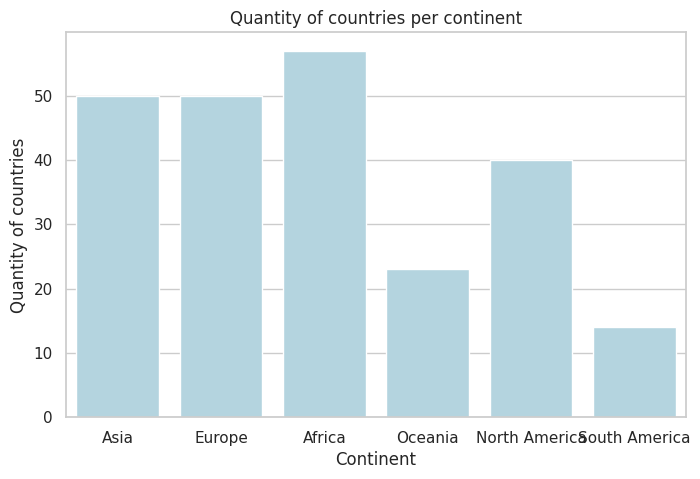

In [24]:
# Countplot histogram for demonstration of countries per continent

plt.figure(figsize=(8, 5))
sns.countplot(x='Continent', data=world_df, color='lightblue')
plt.title('Quantity of countries per continent')
plt.xlabel('Continent')
plt.ylabel('Quantity of countries')
plt.show()

In [25]:
# Calculate the sum of all numeric valuse in the dataset per Continent

continent_df = world_df.groupby(by='Continent').sum(' ')
continent_df

,Rank,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),Growth_Rate,World
Continent,,,,,,,,,,,,,
Africa,5253,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348,30317963,7127.7158,58.2109,17.87
Asia,3878,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290,32138141,51251.2068,50.4692,59.19
Europe,6225,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991,23010411,33166.2371,50.1128,9.33
North America,6437,600296136,594236593,570383850,542720651,486069584,421266425,368293361,315434606,24244178,10910.4703,40.1670,7.51
Oceania,4336,45038554,43933426,40403283,37102764,31222778,26743822,22920240,19480270,8515081,3048.4905,23.1698,0.55
South America,1366,436816608,431530043,413134396,393078250,349634282,297146415,241789006,192947156,17833382,293.6077,14.1114,5.48


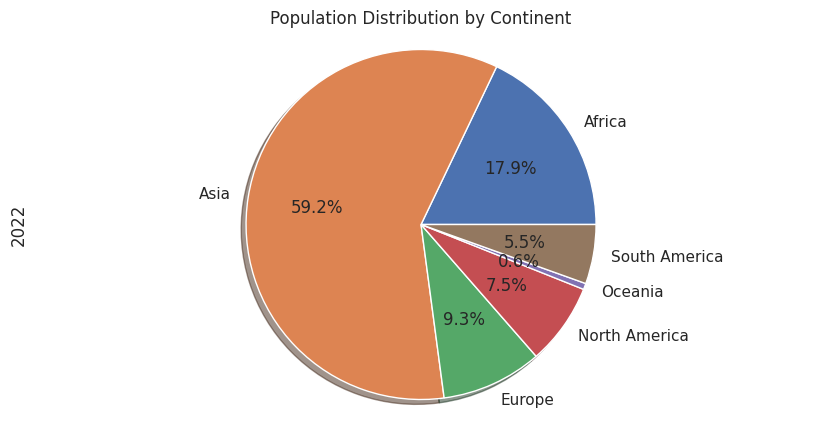

In [26]:
# Pie-chart showing Population Distribution by Continent in percents

continent_df['2022'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%1.1f%%')
plt.title('Population Distribution by Continent')
plt.axis('equal')
plt.show()

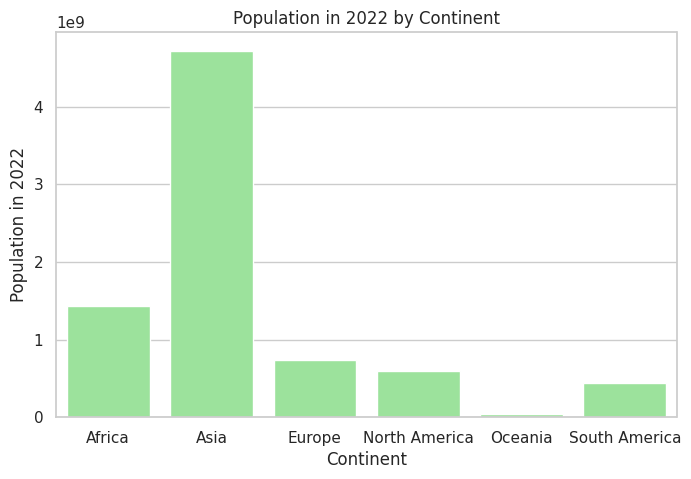

In [27]:
from typing import Any
# Population in 2022 by Continent

plt.figure(figsize=(8, 5))
sns.barplot(x='Continent', y='2022', data=continent_df, color='lightgreen')
plt.title('Population in 2022 by Continent')
plt.xlabel('Continent')
plt.ylabel('Population in 2022')
plt.show()

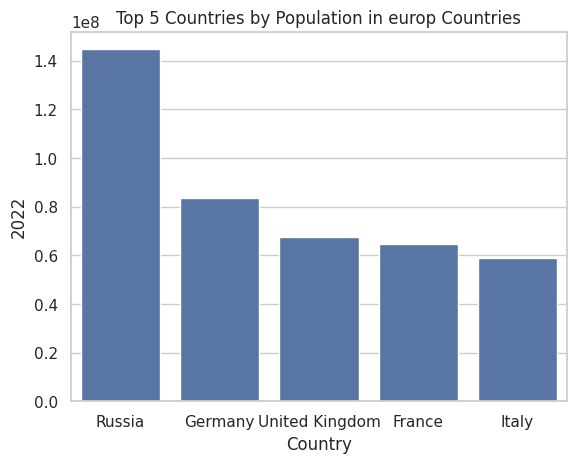

In [28]:
# creating dataframe for countries per continent == Europe
# method loc
# world_df.loc[117] # To display one row acoording ot its index (for example 117) with all colums.
# world_df.loc[[117,118,119,120,121,200, 210]] # To display few rows according to its indexes in table view.

europa_df = world_df.loc[world_df["Continent"]=="Europe"].sort_values(by=["2022"], ascending=False, ignore_index=True)
europa_top5_df = europa_df[["Country_Territory", "2022"]].sort_values(by="2022", ascending=False).head(5)
# europa_top5_df

sns.barplot(data=europa_top5_df, x="Country_Territory", y="2022")
plt.title("Top 5 Countries by Population in europ Countries")
plt.xlabel("Country")
plt.ylabel("2022")
plt.show()

## Insights:

- Asia is the most populated Continent in the world, having almost 60% of word's population. Population of Europe is only 9,3 % (the third place after Africa).
- Oceania is the lest populated continent preceeded by South America and North America.
- Russia is the most populated Country in the Europe continent almost doubling population of Germany, which is following country in the list.

## Step 7. Creating and saving subset of Dataframe for distribution.

Countries in North America Continent will be joined to South America continent to save subset to csv file for distribution and further analysis.

In [29]:
# Select countries that belong to North America continend and save to separate dataset.

df_North_America = world_df[world_df['Continent'].isin(['North America'])]
df_North_America.head(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),Growth_Rate,World
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00
10,198,ABW,Aruba,Oranjestad,North America,106445,106585,104257,100341,89101,65712,62267,59106,180,591.3611,0.9991,0.00
14,176,BHS,Bahamas,Nassau,North America,409984,406471,392697,373272,325014,270679,223752,179129,13943,29.4043,1.0051,0.01
17,186,BRB,Barbados,Bridgetown,North America,281635,280693,278083,274711,264657,258868,253575,241397,430,654.9651,1.0015,0.00


In [30]:
df_North_America.shape

(40, 17)

In [31]:
# Select countries that belong to South America continend and save to separate dataset.

df_South_America = world_df[world_df['Continent'].isin(['South America'])]
df_South_America.head(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),Growth_Rate,World
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57
24,80,BOL,Bolivia,Sucre,South America,12224110,11936162,11090085,10223270,8592656,7096194,5736088,4585693,1098581,11.1272,1.0120,0.15
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
40,65,CHL,Chile,Santiago,South America,19603733,19300315,17870124,17004162,15351799,13342868,11469828,9820481,756102,25.9274,1.0057,0.25
42,28,COL,Colombia,Bogota,South America,51874024,50930662,47119728,44816108,39215135,32601393,26176195,20905254,1141748,45.4339,1.0069,0.65


In [32]:
df_South_America.shape

(14, 17)

In [33]:
# Join to subsets into one with concat method

df_America = pd.concat([df_North_America, df_South_America])
df_America.head(5)

,Rank,CCA3,Country_Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),Growth_Rate,World
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00
10,198,ABW,Aruba,Oranjestad,North America,106445,106585,104257,100341,89101,65712,62267,59106,180,591.3611,0.9991,0.00
14,176,BHS,Bahamas,Nassau,North America,409984,406471,392697,373272,325014,270679,223752,179129,13943,29.4043,1.0051,0.01
17,186,BRB,Barbados,Bridgetown,North America,281635,280693,278083,274711,264657,258868,253575,241397,430,654.9651,1.0015,0.00


In [34]:
df_America.shape

(54, 17)

In [35]:
# To save selected subset to csv if further distribution is needed.

df_America.to_csv("//content/sample_data/df_America.csv")

## Step 8. Investigation of dependencies between Growth Rate, Density and Area.

Using Scatterplot visualisation tool check if there exests any type of dependencies between Growth Rate, Density (of population) and Area of the continent/country.

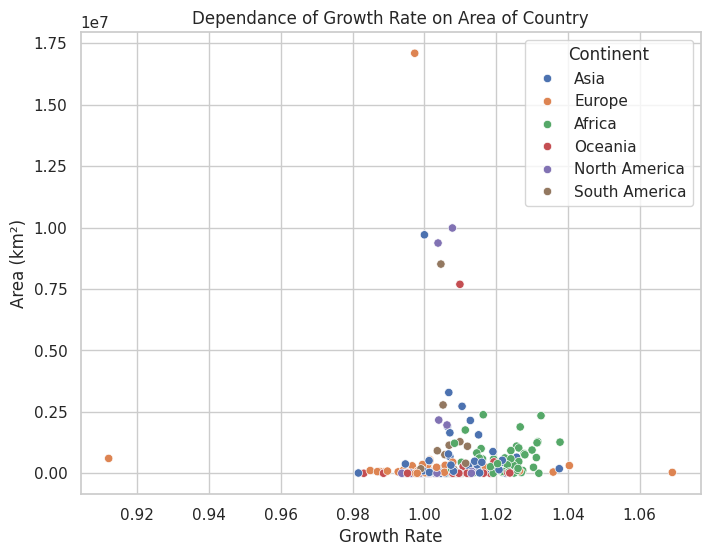

In [36]:
# Scatter plot demonstration of dependency between growth Rate on Area of country/continent.

plt.figure(figsize=(8,6))
sns.scatterplot(x='Growth_Rate', y='Area_(km²)', data=world_df, hue='Continent')
plt.title('Dependance of Growth Rate on Area of Country')
plt.xlabel('Growth Rate')
plt.ylabel('Area (km²)')
plt.show()

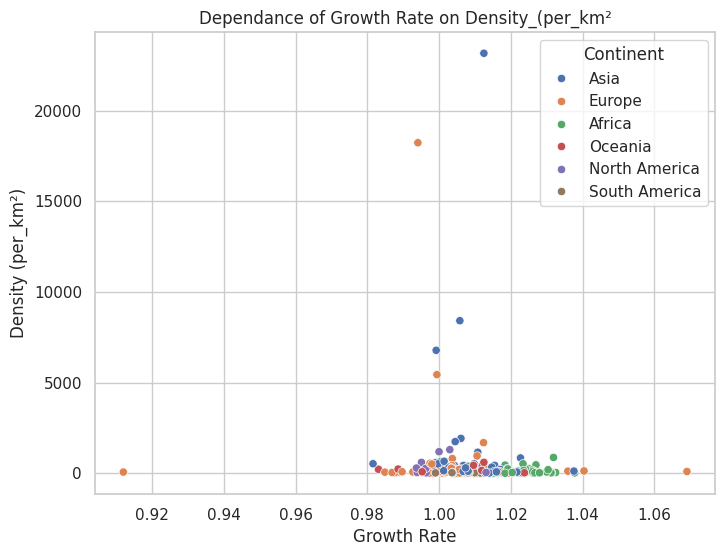

In [37]:
# Scatter plot demonstration of dependency between growth Rate on Density per_km² of Country/Continent.

plt.figure(figsize=(8,6))
sns.scatterplot(x='Growth_Rate', y='Density_(per_km²)', data=world_df, hue='Continent')
plt.title('Dependance of Growth Rate on Density_(per_km²')
plt.xlabel('Growth Rate')
plt.ylabel('Density (per_km²)')
plt.show()

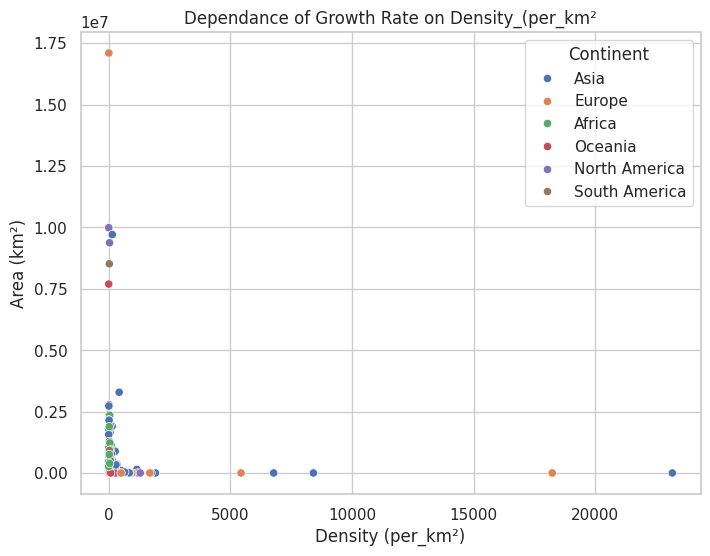

In [38]:
# Scatter plot demonstration connection between Area on Density.

plt.figure(figsize=(8,6))
sns.scatterplot(x='Density_(per_km²)', y='Area_(km²)', data=world_df, hue='Continent')
plt.title('Dependance of Growth Rate on Density_(per_km²')
plt.xlabel('Density (per_km²)')
plt.ylabel('Area (km²)')
plt.show()

# The outcome is not very informative. It doest demonstrate strong dependencies of Growth Rate of population on Density per per_km².

## Insights:

- Growth Rate indicator lays between 0.98 and 1.04.
- The outcome demonstrate the absence of dependency of population Growth Rate indicator on the Area or population Density on the continent.
- Also, there is no dependencu between Area and Dencity.
- For more precise analysis it might be useful to check each continent separately. As it was demonstrated earlier the indicstors between continents vary significantly.

## Step 9. Investigation of Growth Rate, Density and Area per continent.

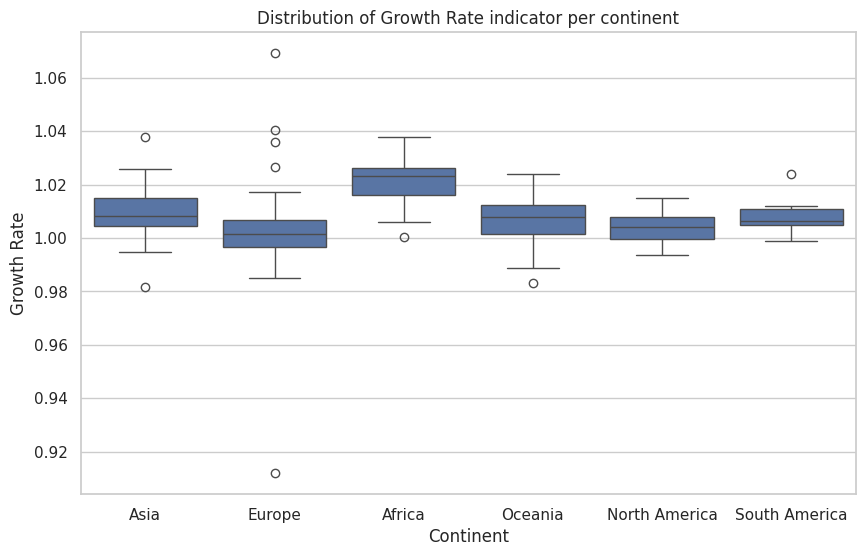

In [39]:
# Boxplot: Growth Rate distribution by continent

plt.figure(figsize=(10,6))
sns.boxplot(x='Continent', y='Growth_Rate', data=world_df)
plt.title('Distribution of Growth Rate indicator per continent')
plt.xlabel('Continent')
plt.ylabel('Growth Rate')
plt.show()

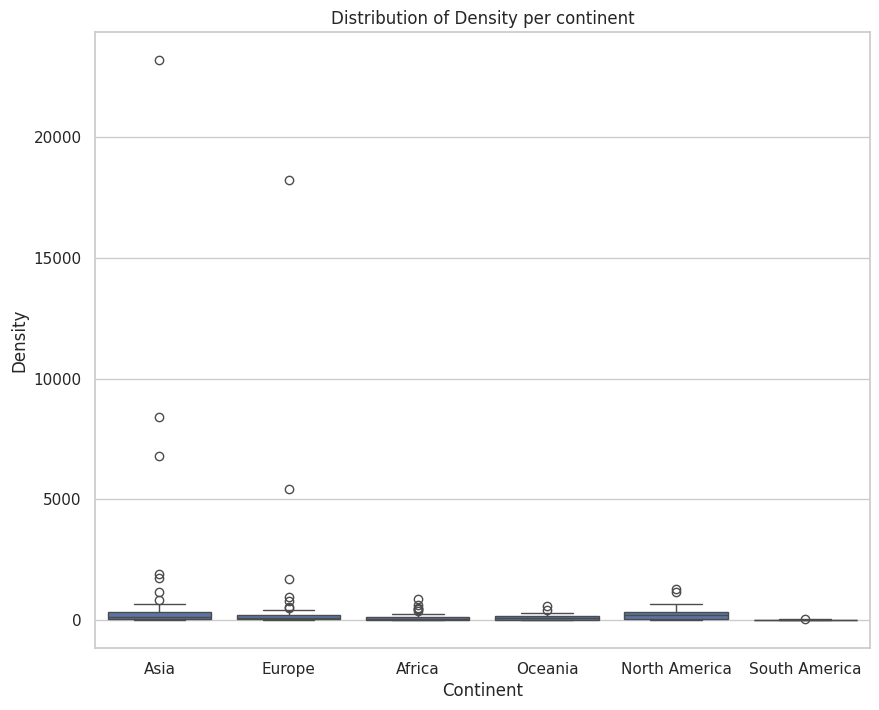

In [40]:
# Boxplot: Density distribution by continent.

plt.figure(figsize=(10,8))
sns.boxplot(x='Continent', y='Density_(per_km²)', data=world_df)
plt.title('Distribution of Density per continent')
plt.xlabel('Continent')
plt.ylabel('Density')
plt.show()

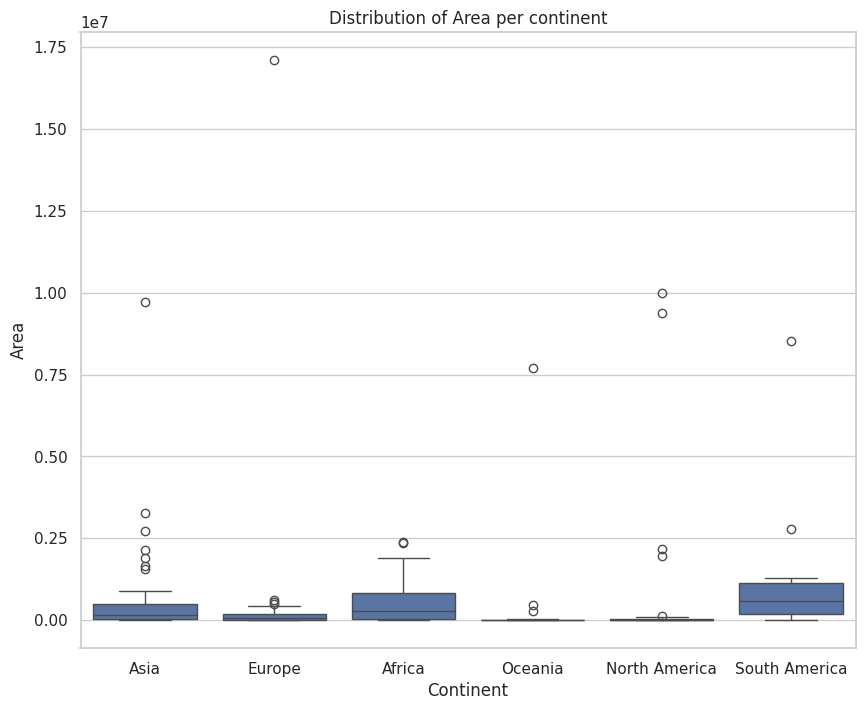

In [41]:
# Boxplot: Area distribution by continent.

plt.figure(figsize=(10,8))
sns.boxplot(x='Continent', y='Area_(km²)', data=world_df)
plt.title('Distribution of Area per continent')
plt.xlabel('Continent')
plt.ylabel('Area')
plt.show()

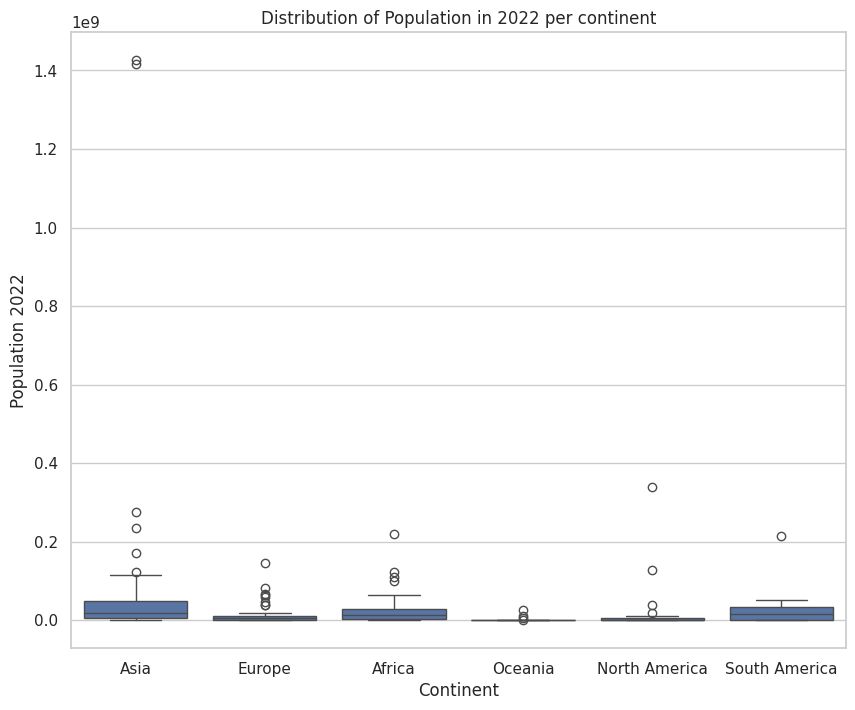

In [42]:
# Boxplot: Population 2022 distribution by continent.

plt.figure(figsize=(10,8))
sns.boxplot(x='Continent', y='2022', data=world_df)
plt.title('Distribution of Population in 2022 per continent')
plt.xlabel('Continent')
plt.ylabel('Population 2022')
plt.show()

## Insights:

- Growth distribution by continent clearly shows that two countries with extreme values of Growth Rate (min and max) are in Europe. Also Europe is continent with lowest mean value Growth Rate.
- Africa is the continent with highest Growth Rate.

## Step 10. Research with the help of correlation matrixes.

In [43]:
# Correlation matrix using all numeric values from the dataset. Table view.

numeric_data = world_df.select_dtypes(include=[np.number])
corr = numeric_data.corr()
corr

,Rank,2022,2020,2015,2010,2000,1990,1980,1970,Area_(km²),Density_(per_km²),Growth_Rate,World
Rank,1.000000,-0.358361,-0.355854,-0.351222,-0.347461,-0.341057,-0.336152,-0.335246,-0.335379,-0.383774,0.129436,-0.224561,-0.358464
2022,-0.358361,1.000000,0.999946,0.999490,0.998629,0.994605,0.987228,0.980285,0.973162,0.453411,-0.027618,-0.020863,0.999999
2020,-0.355854,0.999946,1.000000,0.999763,0.999105,0.995583,0.988724,0.982121,0.975254,0.454993,-0.027358,-0.025116,0.999944
2015,-0.351222,0.999490,0.999763,1.000000,0.999783,0.997340,0.991594,0.985724,0.979414,0.458240,-0.026857,-0.032154,0.999487
2010,-0.347461,0.998629,0.999105,0.999783,1.000000,0.998593,0.993929,0.988786,0.983042,0.461936,-0.026505,-0.037983,0.998626
2000,-0.341057,0.994605,0.995583,0.997340,0.998593,1.000000,0.998336,0.995160,0.990956,0.473933,-0.026139,-0.050515,0.994598
1990,-0.336152,0.987228,0.988724,0.991594,0.993929,0.998336,1.000000,0.999042,0.996602,0.486764,-0.026224,-0.062397,0.987218
1980,-0.335246,0.980285,0.982121,0.985724,0.988786,0.995160,0.999042,1.000000,0.999194,0.498166,-0.026587,-0.072349,0.980273
1970,-0.335379,0.973162,0.975254,0.979414,0.983042,0.990956,0.996602,0.999194,1.000000,0.509940,-0.026881,-0.081313,0.973150
Area_(km²),-0.383774,0.453411,0.454993,0.458240,0.461936,0.473933,0.486764,0.498166,0.509940,1.000000,-0.063128,-0.013970,0.453284


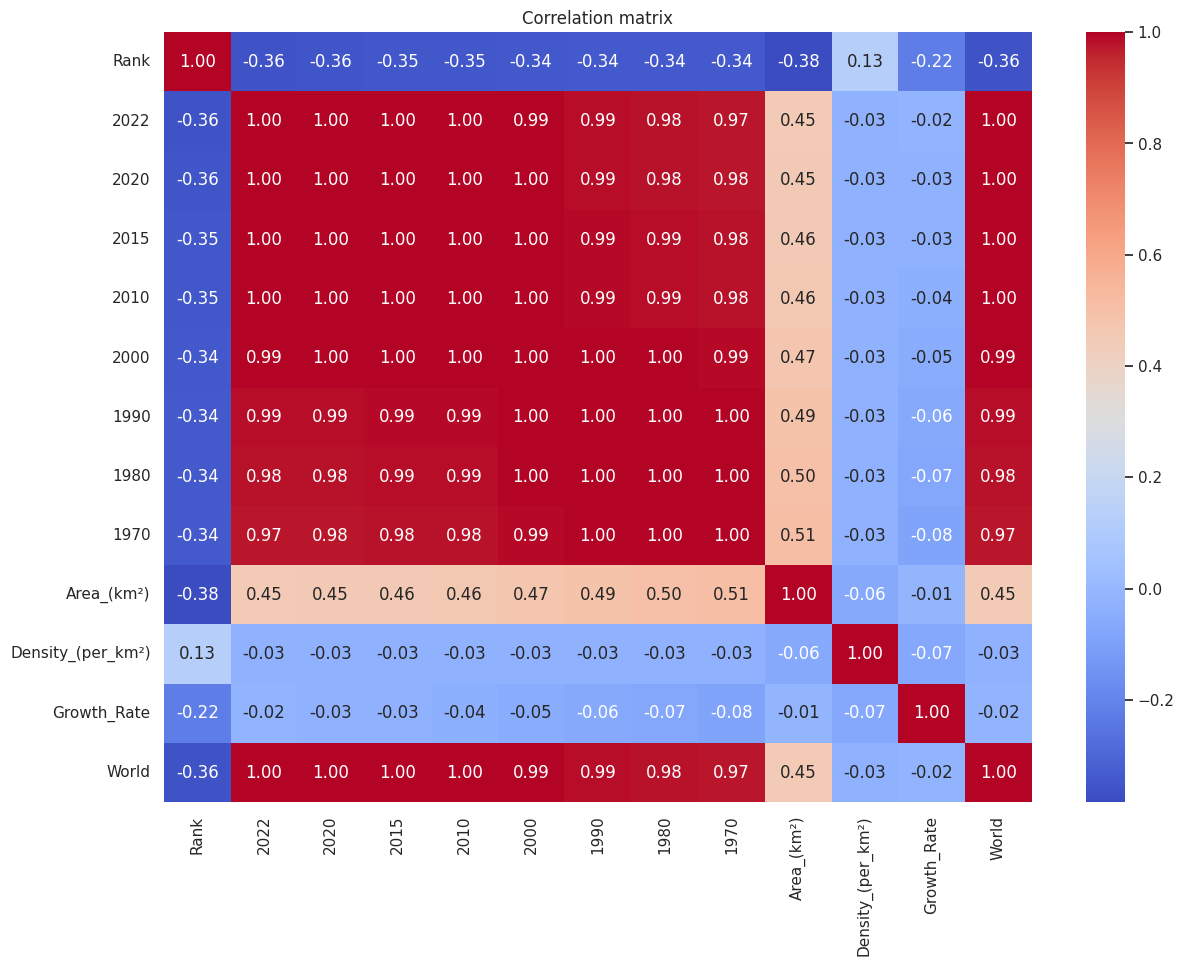

In [44]:
# Correlation matrix using all numeric values from the dataset. HeatMap view.

numeric_data = world_df.select_dtypes(include=[np.number])
corr = numeric_data.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

## Insights:

- With the help of correlation matrix positive correlation between Population and Area of the country is identified. This hypothesis to be investigated with the help of Pearson coefficient in the following chapter.
- Other significant positive or negative correlation that could be further investigated are not detected in this dataset.

## Step 11. Hypothesis to check.
### 1. The bigger Area of the country the bigger population *italicised text*
 Гіпотеза: The bigger countrie's Area (`Area_(km²)`), the bigger population of the country (`2022`).  

- Zero Hypothesys(\( H_0 \)): There is no correlation between the area of the country and population.
- Alternative Hypothesys (\( H_A \)): There is a positive correlation between area of the country and population.

 **Correlation check with the help of  Pearson coefficient:**
- Correlation coefficient \( r \) (from -1 to 1) demonstrates strenght and direction of connection:
  - \( r > 0 \) → positive connection (the bigger Area, bigger Population).
  - \( r < 0 \) → negative connection (the bigger Area, smaller Population).
  - \( r ≈ 0 \) → no connection.
- p-value:
  - if \( p < 0.05 \), the correlation is statistically significant. Alternative hypothesis is confirmed, zero hypothesis is rejected.
  - if \( p > 0.05 \),  zero and alternative hypotheses are rejected.

Correlation: 0.45, p-value: 0.00000


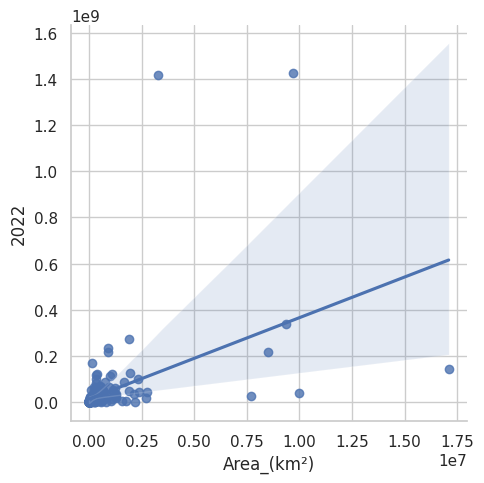

In [47]:
# Dependency of countries population on Area. Pearson coefficient

# Correlation calculation
corr, p_value = stats.pearsonr(world_df["Area_(km²)"], world_df["2022"])
print(f"Correlation: {corr:.2f}, p-value: {p_value:.5f}")

# Visualization
sns.lmplot(x="Area_(km²)", y="2022", data=world_df)
plt.show()

## Conclusion:
-  r > 0 and p < 0.05, shows that bigger Area leads to bigger Population.
---

## Consolidated conclusion:

Analysing simple dataset for learn-and-practice data analytical skills puprpose I found intersting insights to share with community. World's population dataset:

- Population of planet doubled over the period from 1970 to 2022 (52 years),  rising from 3,5 Billion people to 8,2 Billion people. Quantity of Countries with hight Growth Coefficient is bigger than with low Growth Coefficient, it means that World's population will continue to rise.
- Also Europe is continent with lowest mean value of population Growth Rate.
- In 2022, Ukraine was the country with lowest Growth Rate Indicator equal to 0.9120. Maximum Growth Rate Indicator was equal to 1.0691 and belonged to Moldova.
- Highest Density rate (quantity of people living per km²) is 23 172 in Macau followed by Monaco and Singapore. Lowest Density rate is 0.0261 in Greenland.
- Territory of smallest country in the world is equal to 1 km² while the biggest 17 098 242 km².
- Asia is the most populated Continent in the world, having almost 60% of word's population. Population of Europe is only 9,3 % (the third place after Africa).
- With the help of correlation matrix positive correlation between Population and Area of the country is identified. This hypothesis to be investigated with the help of Pearson's coefficient.
- Other significant positive or negative correlation that could be further investigated are not detected in this dataset.
- Pearson's coefficient test shows that bigger Area leads to bigger Population.